<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/preprocessing%26EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm  # Progress bar for large datasets
import tensorflow as tf

In [20]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-alphabet


In [21]:
0# Listing the directories in the path in a list

dataset_path = "/kaggle/input/asl-alphabet"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_test', 'asl_alphabet_train']


In [4]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("Classes in dataset:", classes)
print("Total classes:", len(classes))

Classes in dataset: ['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']
Total classes: 29


Classes in dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


Processing classes: 100%|██████████| 29/29 [00:03<00:00,  8.14it/s]


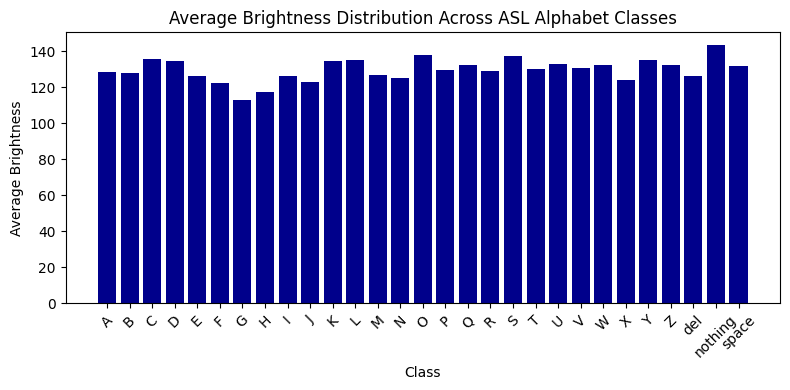

In [12]:

# Define dataset path
dataset_path = "/kaggle/input/asl-alphabet"  # Change this to your actual path
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# List classes
classes = sorted(os.listdir(train_path))
print("Classes in dataset:", classes)
print("Total classes:", len(classes))

# Initialize dictionary to store brightness values
brightness_dict = {cls: [] for cls in classes}

# Loop through each class and calculate brightness
for cls in tqdm(classes, desc="Processing classes"):
    class_path = os.path.join(train_path, cls)
    image_files = os.listdir(class_path)

    # Limit to a sample if dataset is large (e.g., first 100 images per class)
    for img_file in image_files[:100]:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        brightness = np.mean(gray)
        brightness_dict[cls].append(brightness)

# Compute average brightness per class
avg_brightness = {cls: np.mean(vals) for cls, vals in brightness_dict.items()}

# Plot brightness distribution
plt.figure(figsize=(8, 4))
plt.bar(avg_brightness.keys(), avg_brightness.values(), color='darkblue')
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Average Brightness')
plt.title('Average Brightness Distribution Across ASL Alphabet Classes')
plt.tight_layout()
plt.savefig('bright.png', dpi=300, bbox_inches='tight')
plt.show()


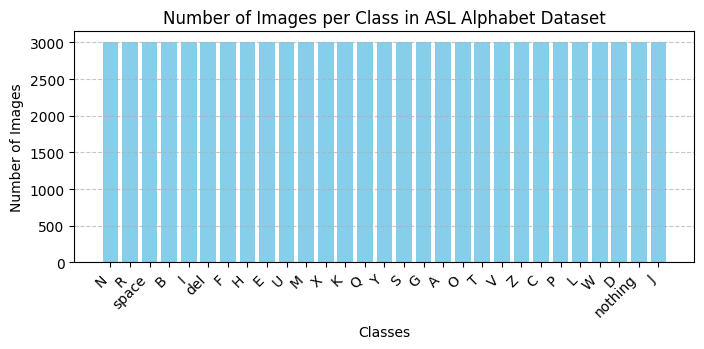

In [14]:
import os
import matplotlib.pyplot as plt

# Path to training dataset
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# Get class names
classes = os.listdir(train_path)

# Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}

# Sort by count (optional)
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(8, 3))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in ASL Alphabet Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Classes in dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


Processing classes for contrast: 100%|██████████| 29/29 [00:03<00:00,  7.94it/s]


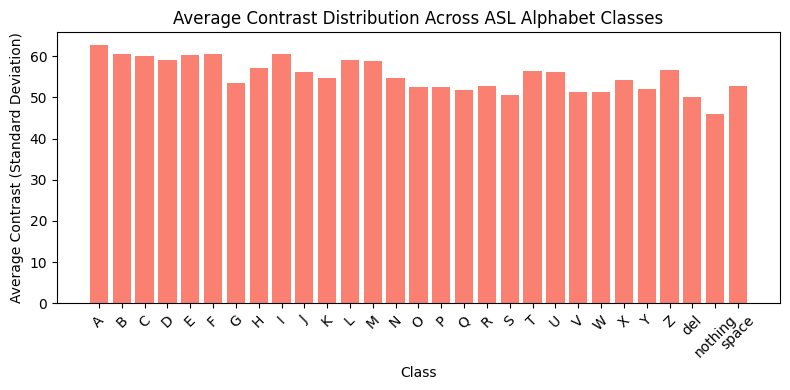

In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define dataset path
dataset_path = "/kaggle/input/asl-alphabet"  # Change this to your actual path
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# List classes
classes = sorted(os.listdir(train_path))
print("Classes in dataset:", classes)
print("Total classes:", len(classes))

# Initialize dictionary to store contrast values
contrast_dict = {cls: [] for cls in classes}

# Loop through each class and calculate contrast (standard deviation)
for cls in tqdm(classes, desc="Processing classes for contrast"):
    class_path = os.path.join(train_path, cls)
    image_files = os.listdir(class_path)

    # Limit to a sample if dataset is large (e.g., first 100 images per class)
    for img_file in image_files[:100]:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contrast = np.std(gray)
        contrast_dict[cls].append(contrast)

# Compute average contrast per class
avg_contrast = {cls: np.mean(vals) for cls, vals in contrast_dict.items()}

# Plot contrast distribution
plt.figure(figsize=(8, 4))
plt.bar(avg_contrast.keys(), avg_contrast.values(), color='salmon')
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Average Contrast (Standard Deviation)')
plt.title('Average Contrast Distribution Across ASL Alphabet Classes')
plt.tight_layout()
plt.show()


Classes in dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


Processing classes for sharpness: 100%|██████████| 29/29 [00:03<00:00,  7.45it/s]


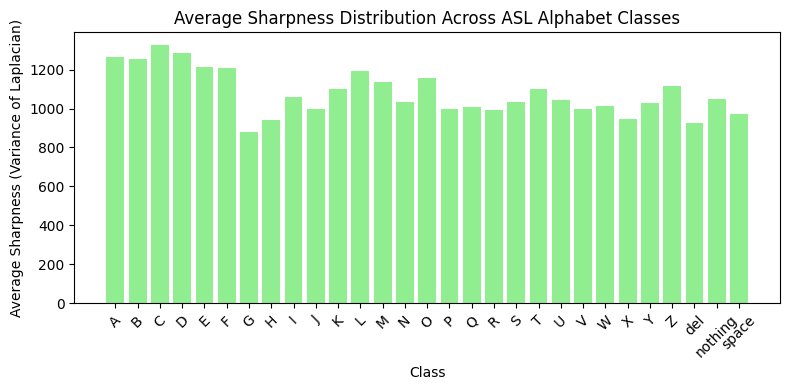

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define dataset path
dataset_path = "/kaggle/input/asl-alphabet"  # Change this to your actual path
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# List classes
classes = sorted(os.listdir(train_path))
print("Classes in dataset:", classes)
print("Total classes:", len(classes))

# Initialize dictionary to store sharpness values
sharpness_dict = {cls: [] for cls in classes}

# Loop through each class and calculate sharpness
for cls in tqdm(classes, desc="Processing classes for sharpness"):
    class_path = os.path.join(train_path, cls)
    image_files = os.listdir(class_path)

    # Limit to a sample if dataset is large (e.g., first 100 images per class)
    for img_file in image_files[:100]:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Sharpness as variance of Laplacian
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        sharpness_dict[cls].append(laplacian_var)

# Compute average sharpness per class
avg_sharpness = {cls: np.mean(vals) for cls, vals in sharpness_dict.items()}

# Plot sharpness distribution
plt.figure(figsize=(8, 4))
plt.bar(avg_sharpness.keys(), avg_sharpness.values(), color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Average Sharpness (Variance of Laplacian)')
plt.title('Average Sharpness Distribution Across ASL Alphabet Classes')
plt.tight_layout()
plt.show()


In [9]:
# Listing the classes in asl_alphabet_test

train_path = os.path.join(dataset_path, "asl_alphabet_test" , "asl_alphabet_test")
clas = os.listdir(train_path)

print("Classes in dataset:", clas)
print("Total classes:", len(clas))

Classes in dataset: ['A_test.jpg', 'E_test.jpg', 'L_test.jpg', 'N_test.jpg', 'S_test.jpg', 'D_test.jpg', 'G_test.jpg', 'I_test.jpg', 'W_test.jpg', 'M_test.jpg', 'nothing_test.jpg', 'X_test.jpg', 'H_test.jpg', 'Q_test.jpg', 'C_test.jpg', 'T_test.jpg', 'P_test.jpg', 'V_test.jpg', 'Y_test.jpg', 'U_test.jpg', 'space_test.jpg', 'O_test.jpg', 'B_test.jpg', 'R_test.jpg', 'F_test.jpg', 'Z_test.jpg', 'J_test.jpg', 'K_test.jpg']
Total classes: 28


/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/S/S301.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/H/H2240.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N881.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing2812.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/R/R1099.jpg


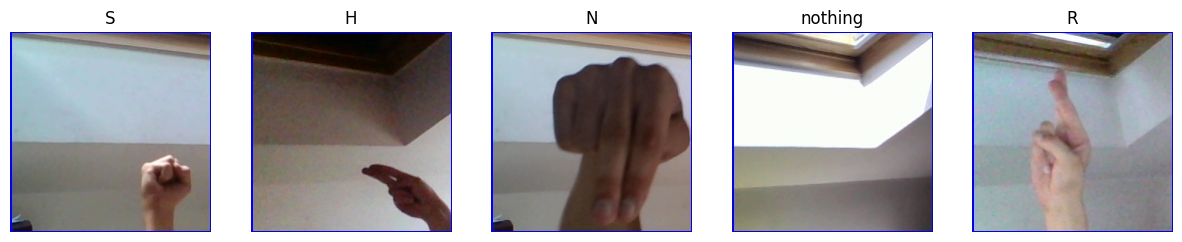

In [22]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [24]:

# Define paths
input_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding (adaptive for better hand detection)
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [10:06<00:00, 20.91s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [25]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['S', 'F', 'K', 'G', 'I', 'X', 'O', 'J', 'M', 'U', 'L', 'T', 'H', 'N', 'R', 'Q', 'space', 'nothing', 'del', 'A', 'W', 'P', 'Y', 'D', 'V', 'B', 'Z', 'E', 'C']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/I/I833.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/X/X2689.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/O/O1966.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/W/W1554.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/N/N1650.jpg


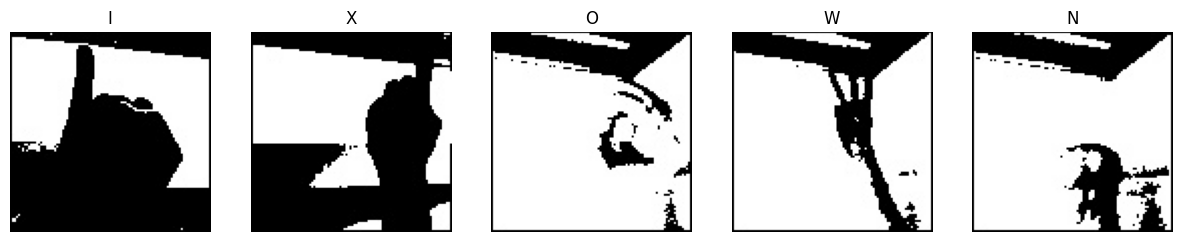

In [26]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)